In [38]:
from google.colab import files
uploaded = files.upload()

Saving Engg_College_Data.csv to Engg_College_Data (1).csv


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

college = pd.read_csv('Engg_College_Data.csv')
X = college.iloc[:,2:]
X.head

<bound method NDFrame.head of     Teaching  Fees  Placements  Internship  Infrastructure
0          5     2           5           5               3
1          4     2           5           5               3
2          4     5           5           4               5
3          5     4           5           4               4
4          2     5           2           2               5
5          3     4           3           3               4
6          1     3           1           1               2
7          4     4           5           5               5
8          4     4           4           4               4
9          3     4           3           4               5
10         3     4           3           4               5
11         2     5           3           2               3
12         1     5           1           2               2
13         3     5           3           3               4
14         3     2           2           2               3
15         3     3        

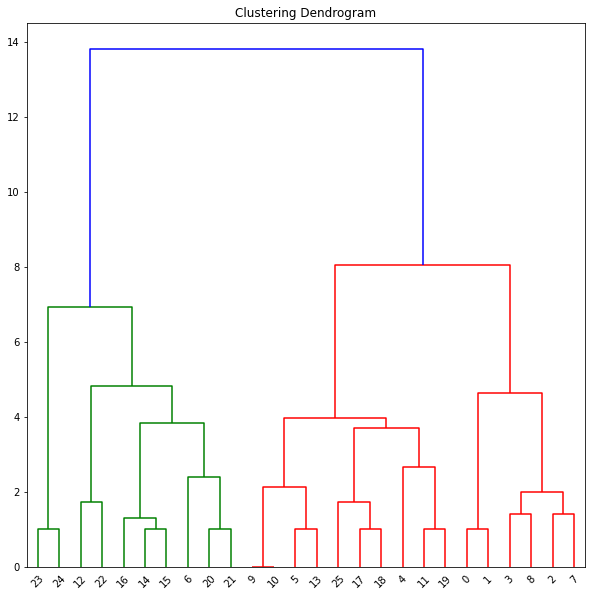

In [40]:
# Разбиение на кластеры через scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X, 'ward')

fig = plt.figure(figsize=(10, 10))
plt.title('Clustering Dendrogram')
dn = dendrogram(Z)

In [41]:
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt
label = fcluster(Z, 10, criterion='distance')
college['pred_scipy'] = label
np.unique(label)

array([1, 2], dtype=int32)

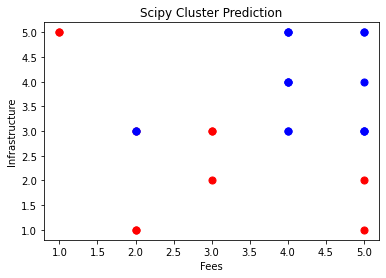

In [42]:
plt.scatter(college.loc[label==1, 'Fees'], college.loc[label==1, 'Infrastructure'], s=50, marker='o', color='red')
plt.scatter(college.loc[label==2, 'Fees'], college.loc[label==2, 'Infrastructure'], s=50, marker='o', color='blue')
plt.xlabel('Fees')
plt.ylabel('Infrastructure')
plt.title('Scipy Cluster Prediction')
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 2])

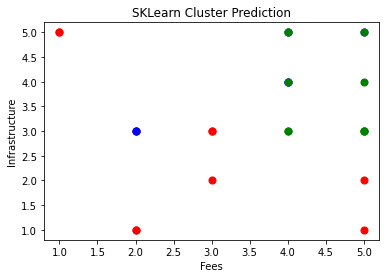

In [44]:
X['pred_sklearn'] = y_hc
plt.scatter(X.loc[y_hc==0, 'Fees'], X.loc[y_hc==0, 'Infrastructure'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'Fees'], X.loc[y_hc==1, 'Infrastructure'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'Fees'], X.loc[y_hc==2, 'Infrastructure'], s=50, marker='o', color='green')
plt.xlabel('Fees')
plt.ylabel('Infrastructure')
plt.title('SKLearn Cluster Prediction')
plt.show()